# Exam #2 Retake - FDS FALL 19' - EDA, Statistics and Preprocessing

For this part, you will work with a census data set. Please find the data file and the data dictionary attached.

<div class="alert alert-warning">
<b>Important:</b> Make sure you follow what we learned regarding what should be done on the train set and what should be done on the test set
</div>

<div class="alert alert-info">
<b>Note:</b> You should submit the answers to this question in a report format - everything you do should be documented, you should track the changes to the shape of your dataset, explain the business thought behind your decisions and make everything super clear
</div>

<div class="alert alert-warning">
<b>Important:</b> Do not perform actions that are not neccessary. Make sure there is a thought behind each step you take
</div>

**Here are some packages you will need:**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

**Here are some helper functions for your use:**

In [2]:
def get_redundant_binary_cols(data, threshold):
    '''
    This function gets a pandas DataFrame, and a threshold (% of data), 
    and returns the list of binary features from that dataframe that have 
    above threshold amount of samples with the same value, and thus
    should be considered redundant. 
    '''
    
    bool_cols = [col for col in data \
             if pd.Series(data[col].unique()).isin([0, 1]).all()]
    return [x for x in bool_cols if data[x].value_counts()[0] \
                                                > threshold * len(X_train)] + \
                    [x for x in bool_cols if data[x].value_counts()[1] \
                                                > threshold * len(X_train)]

`pd.to_datetime(df.Date)`: will transfer a string column to a date type

**Questions:**

1. Read the data file and present summary statistics, datatype per column and NA status for each column. 

1.b. Perform data integrity checks if needed (Don't do more than two columns)

In [3]:
df = pd.read_csv('adult_data.csv')

In [4]:
df.shape # data size

(32561, 16)

In [5]:
df.head()  # getting the first 5 rows from our data to see how it look

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()  # data type for each row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education-num   32561 non-null  int64 
 6   marital-status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital-gain    32561 non-null  int64 
 12  capital-loss    32561 non-null  int64 
 13  hours-per-week  32561 non-null  int64 
 14  native-country  32561 non-null  object
 15  income          32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [7]:
df.describe()  # summary statistics = for numeric columns

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,16280.000000,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8140.000000,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,16280.000000,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,24420.000000,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
for col in df:  # checking if there are NaN values by columns, there arent. count will count only not NaN values.
    if df.shape[0] - df[col].count() != 0:
        print("col name:",col, "#NaNs:", df.shape[0]-len(df[col]))

In [9]:
# data integrity for the numeric columns:
display(df.describe().loc[['min', 'max']])

# we can see that the min age is 17 but the data set is of adults. ill asume adult is over 16.

display(df['workclass'].value_counts())
# in workcalss we can notice that there is a question mark that probably stands for NaN or unknown

df['relationship'].value_counts()
# seems legit

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
min,0.0,17.0,12285.0,1.0,0.0,0.0,1.0
max,32560.0,90.0,1484705.0,16.0,99999.0,4356.0,99.0


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

2. We are trying to Predict whether income exceeds $50K/yr, per row in the data (person). According to this research question, define the dependent variable, as well as all the categorical (nominal / ordinal) and continuous features, in a markdown cell

- the dependent variable: 
    - income
- categorical features:
    - workclass - ordinal
    - education - ordinal
    - education-num - ordinal
    - marital-status - nominal
    - occupation - nominal
    - relationship - nominal
    - race - nominal
    - sex - nominal
    - native-country - nominal
- numerical features:
    - age - discrete
    - fnlwgt - continuous 
    - capital-gain - continuous
    - capital-loss - continuous
    - hours-per-week - discrete
    
the feature unnamed is a key/index which is redundant, will be removed

3. Plot the distribution (density plot / histogram) per feature. Make sure you use the correct plot per type of feature, and that you do not plot categorical features with unique values only.

In [10]:
target = 'income'
features = df.columns.to_list()  # splitting between my target and features and removing the redundent feature
features.remove(target)
features.remove('Unnamed: 0')

my_df = df[features + [target]].drop_duplicates()
display(my_df.shape, df.shape)
# we can see that there are few duplicate rows, that were removed.

num_col = my_df.select_dtypes('number').columns.to_list()  # getting numeric columns names
cat_col = my_df.select_dtypes(['object', 'category']).columns.to_list() # getting categoric columns names
cat_col.remove('income')
cat_col.remove('native-country')  # has a lot of values, will plot him aside

(32537, 15)

(32561, 16)

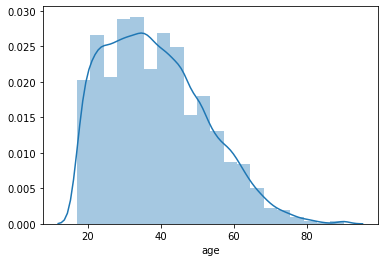

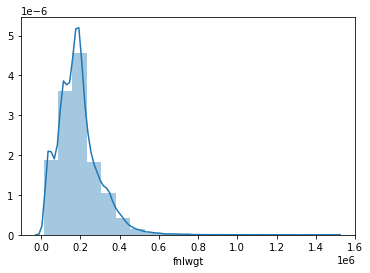

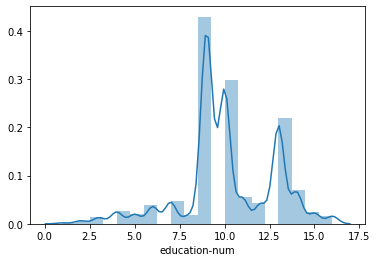

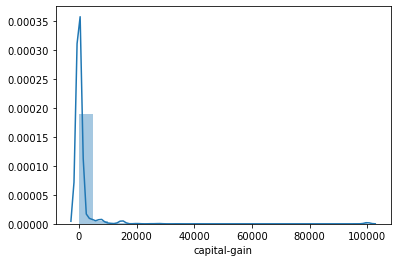

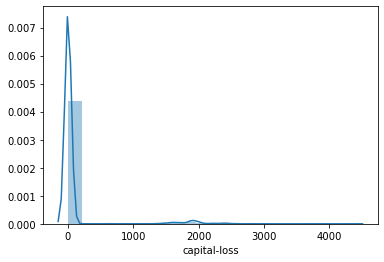

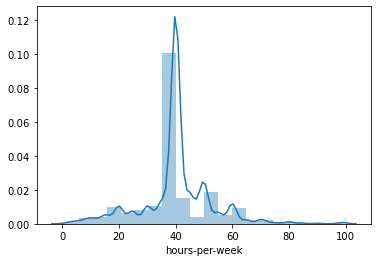

In [11]:
for col in num_col:  
    sns.distplot(my_df[col], bins=20)  # plotting the numeric variables (hist with kde)
    plt.show()

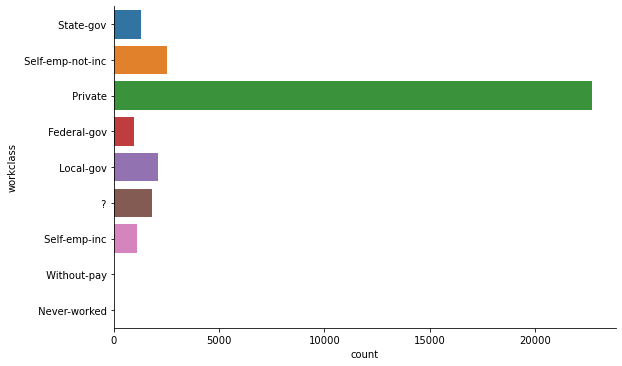

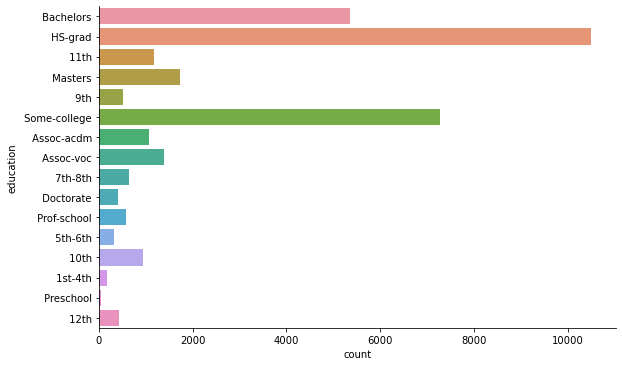

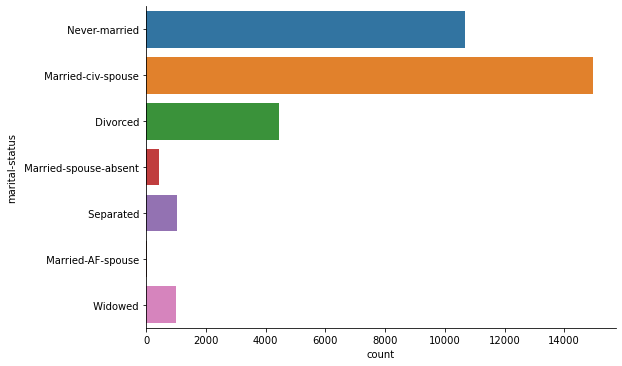

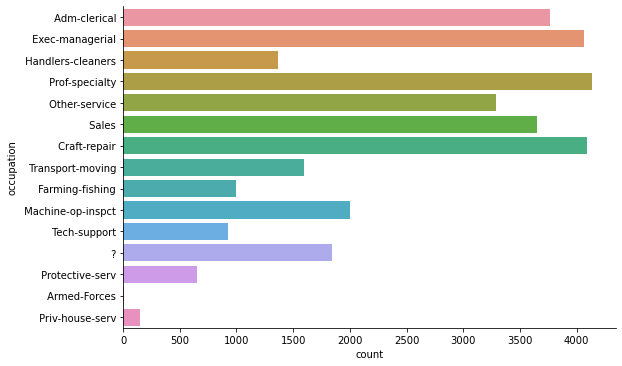

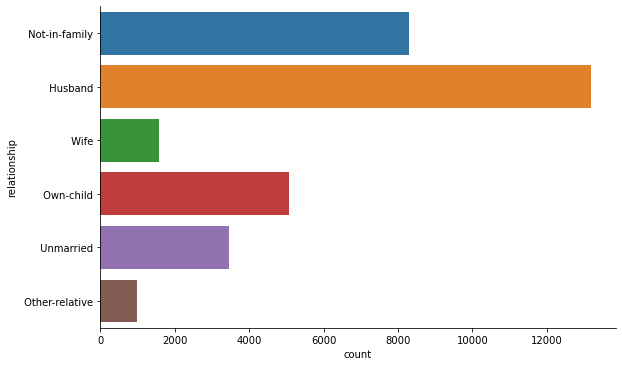

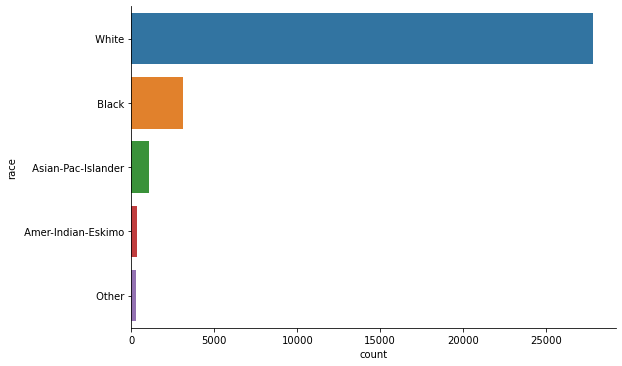

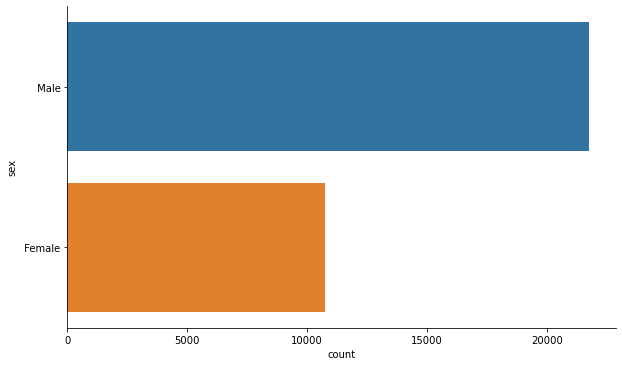

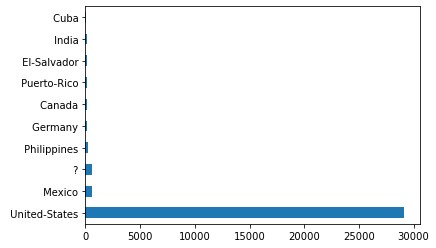

In [12]:
for col in cat_col:
    sns.catplot(y=col, kind='count', data=my_df, aspect=1.75)  # plotting the categorical features
    plt.show()

plt.figure()
my_df['native-country'].value_counts().head(10).plot(kind='barh')  # plotting only top 10 values
plt.show()
# after a look I can see that also occupation has a question mark in his values.

4. Split the data to a train set and a test set according to a method of your choice, and specify your business logic behind this choice 

In [13]:
from sklearn.model_selection import train_test_split

X = my_df[features]
y = my_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23, stratify = my_df['race'])

I have decided to split my data in a stratify manner since I believe that race has a big impact on the income.
I thought also about stratifying by 'sex' but I believe the ratio will remain almost the same since it is binary column, I will check it as well

In [14]:
# here I am validating my split in various ways

display(X_train.shape, X_test.shape)
print(X_train.shape[0]/len(X), X_test.shape[0]/len(X))

display(X_train['race'].value_counts())
display(X_test['race'].value_counts())

print("checking ratio between the splitted fields of 'race':")
for i, val in enumerate(X_train['race'].value_counts()):
    print(X_test['race'].value_counts()[i] / val)

set(X_train.index) & set(X_test.index) 


(24402, 14)

(8135, 14)

0.7499769493192365 0.2500230506807634


 White                 20846
 Black                  2341
 Asian-Pac-Islander      779
 Amer-Indian-Eskimo      233
 Other                   203
Name: race, dtype: int64

 White                 6949
 Black                  781
 Asian-Pac-Islander     259
 Amer-Indian-Eskimo      78
 Other                   68
Name: race, dtype: int64

checking ratio between the splitted fields of 'race':
0.33334932361124436
0.3336181119179838
0.3324775353016688
0.33476394849785407
0.33497536945812806


set()

In [15]:
display(X_train['sex'].value_counts())
display(X_test['sex'].value_counts())

for i, val in enumerate(X_train['sex'].value_counts()):
    print(X_test['sex'].value_counts()[i] / val)
    
# seems to be that the ratio also kept in sex, since it is randomly that is what we expect

 Male      16323
 Female     8079
Name: sex, dtype: int64

 Male      5452
 Female    2683
Name: sex, dtype: int64

0.33400722906328495
0.3320955563807402


## **Take the next steps on <span style="color:red">both datasets</span>, according to the restrictions you learned.**

5. Take care of NA values and outliers (if any). Specify the business logic behind your choice.
    - I already checked and there are zero NA values, i will consider the questions mark as unknown.

In [16]:
import warnings
warnings.filterwarnings('ignore')

X_train['occupation'] = X_train['occupation'].apply(lambda x: ' unknown' if x==' ?' else x)
X_train['workclass'] = X_train['workclass'].apply(lambda x: ' unknown' if x==' ?' else x)
X_test['occupation'] = X_test['occupation'].apply(lambda x: ' unknown' if x==' ?' else x)
X_test['workclass'] = X_test['workclass'].apply(lambda x: ' unknown' if x==' ?' else x)

In [17]:
# X_test['workclass'].value_counts()[3] + X_train['workclass'].value_counts()[3] # checking stuff

outliers check:
    - It seems that age feature has outliers in the older ages
    - I am removing age outliers as most the working community is under 70 yrs
    - I will first remove top 2% of age, and then check for outliers again
    - age now has no outliers
    
    - capital gain has a quite obvious outliers, I will remove it as well, top 5%
    
    - finally I will get rid of the outliers in hours-per-week since there some crazy people working 99 hrs a week, 
      and magician too that works 1 hour per week

In [18]:
X_train = X_train[X_train['age'] < X_train['age'].quantile(0.98)]

In [19]:
X_train = X_train[X_train['capital-gain'] < X_train['capital-gain'].quantile(0.95)]

In [20]:
X_train = X_train[(X_train['hours-per-week'] < X_train['hours-per-week'].quantile(0.98)) & (X_train['hours-per-week'] > X_train['hours-per-week'].quantile(0.02))]

In [21]:
X_train.shape
# we can see that we lost around 3000 rows, out of this data is a lot. around 10%.

(21548, 14)

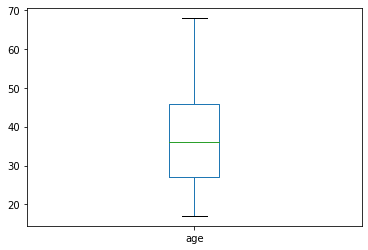

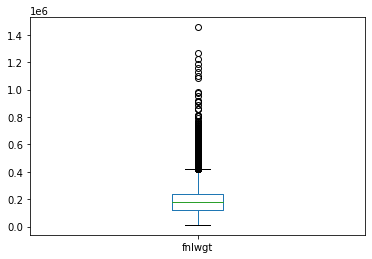

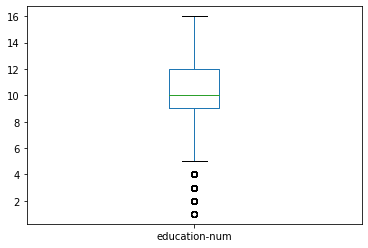

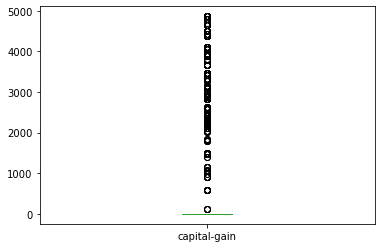

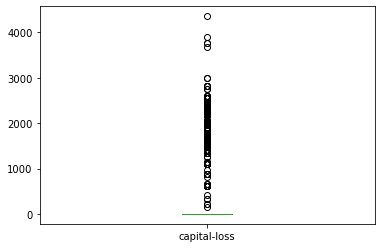

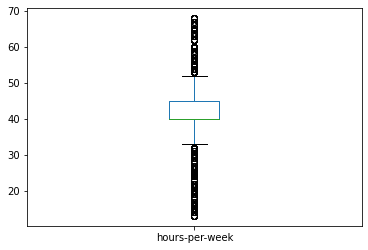

In [22]:
for col in X_train:
    if col in num_col:
        X_train[col].plot(kind='box')
        plt.show()

6. Plot the distribution of 3 variables of your choice against the dependent variable - summarize interesting findings if any. One of the chosen features must be numeric, and another one must be categorical. You can choose the third one as you wish.

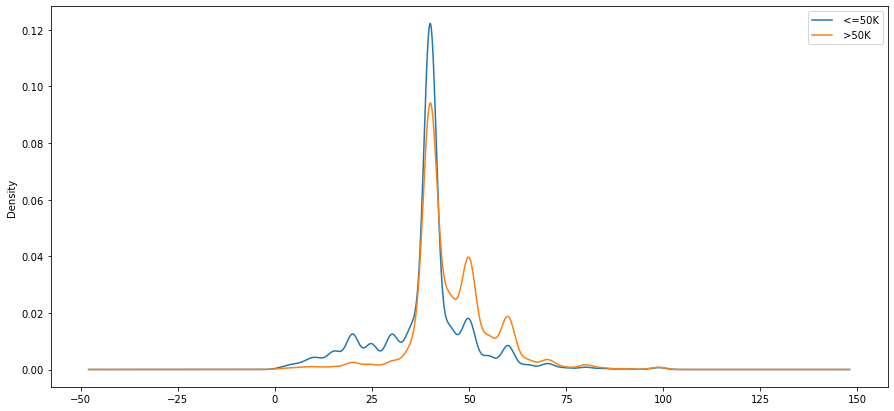

In [23]:
my_df.groupby('income')['hours-per-week'].plot(kind='kde', figsize=(15, 7))
plt.legend()
plt.show()

# I have plotted the income vs the hours per week
# we can see that the majority works arounf 35-40 hrs per week and that most of them will get paid less than 50k 

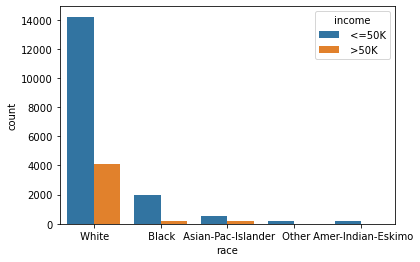

In [24]:
sns.countplot(X_train['race'],hue=y_train)
plt.show()

# we know that most of our data is about white people and therefor the majority of info.
# we need to check by precent how many white earn more than 50k out of less then 50k
# against other races

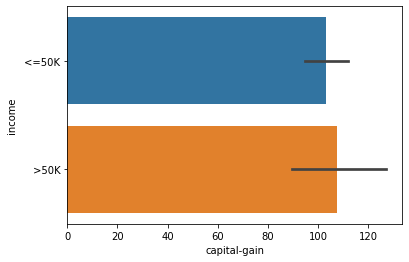

In [25]:
sns.barplot(x=X_train['capital-gain'],y=y_train)
plt.show()

# we can see that the difference in the captial gain is smaller then I expected
# probably related to the lifestyle and expenses

7. Plot the distribution of 3 independent variables against eachother (3 plots overall), including a color bar for the dependent variable - summarize interesting findings if any. One of the chosen features must be numeric, and another one must be categorical. You can choose the third one as you wish.

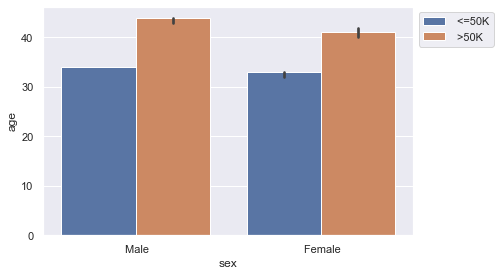

In [26]:
sns.set(style="darkgrid")
sns.barplot(x = X_train['sex'], y = X_train['age'], hue = y_train, estimator=np.median)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# I have plotted the sex by age, calculating the median of each group
# we can see that the uncertinty level is relativly low (black small rectangel)
# more I added the income as well to see how it splits and we can tell that male usualy makes more than women
# and that as older you get you will earn more and the difference between men and women will increase.

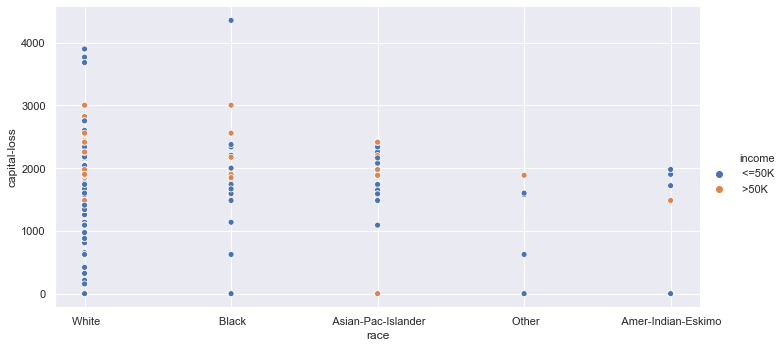

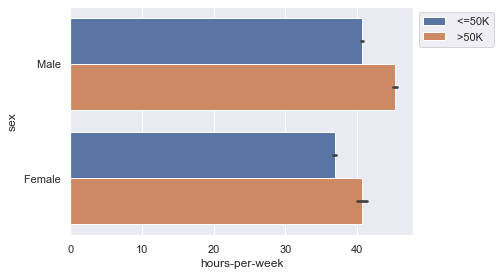

In [27]:
sns.relplot(x='race', y='capital-loss',data=X_train, hue=y_train ,kind="scatter", aspect=2)
plt.show()

sns.barplot(x = X_train['hours-per-week'], y = X_train['sex'], hue = y_train, estimator=np.mean)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# we can see that usually if you work more you earn more, and that males are working more than female - usually.

9. Generate a correlation matrix and plot a heat map of it. What can you say about the correlations?

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


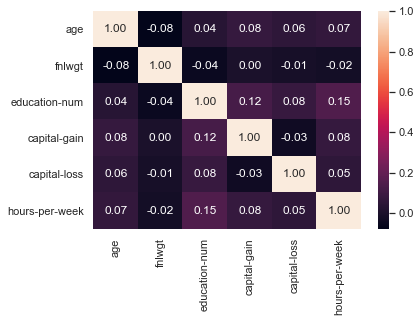

In [28]:
display(my_df.corr())

ax = sns.heatmap(my_df.corr(), annot=True, fmt=".2f")

# we can see that all the numeric features has a low linear correlation with others

11. Deal with 3 of the categorical features (prepare them for a model)

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(X_train['native-country'])
X_train['native-country_num'] = le.transform(X_train['native-country'])

# I have transformed this categorical feature using the label encoder 
# since he is nominal and only 3 values need to be accounted for.

In [30]:
X_test['native-country_num'] = le.transform(X_test['native-country'])

In [31]:
# validating get dummies is the same for both train and test.
X_train['sex'].value_counts(), X_test['sex'].value_counts()

( Male      14251
  Female     7297
 Name: sex, dtype: int64,
  Male      5452
  Female    2683
 Name: sex, dtype: int64)

In [32]:
X_train = pd.get_dummies(X_train, columns=['sex'],drop_first=True)
X_test = pd.get_dummies(X_test, columns=['sex'],drop_first=True)

In [33]:
# I got the same clasification for the dummies.
X_train['sex_ Male'].value_counts(), X_test['sex_ Male'].value_counts()

(1    14251
 0     7297
 Name: sex_ Male, dtype: int64,
 1    5452
 0    2683
 Name: sex_ Male, dtype: int64)

In [34]:
# class_names2["gender_F"] = class_names["gender"].apply(lambda x: 1 if x=="F" else 0)

In [35]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,native-country_num,sex_ Male
6719,27,Private,205188,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,39,1
8430,26,Private,162872,Assoc-acdm,12,Never-married,Prof-specialty,Not-in-family,White,0,0,40,United-States,39,0
15086,27,Private,113635,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,0,0,35,Ireland,21,1
1325,17,unknown,138507,10th,6,Never-married,unknown,Own-child,White,0,0,20,United-States,39,1
1865,60,unknown,386261,Bachelors,13,Married-spouse-absent,unknown,Unmarried,Black,0,0,15,United-States,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16713,43,Private,148998,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,0,0,40,United-States,39,0
10493,48,Local-gov,177018,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,0,0,50,United-States,39,1
21870,49,Self-emp-not-inc,148254,HS-grad,9,Divorced,Farming-fishing,Not-in-family,White,0,0,28,United-States,39,0
28435,20,Private,185452,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,40,United-States,39,0


In [36]:
X_train.drop(columns=['native-country'], inplace=True)
X_test.drop(columns=['native-country'], inplace=True)

In [37]:
le_race = LabelEncoder()
le_race.fit(X_train['race'])
X_train['race_num'] = le_race.transform(X_train['race'])
X_test['race_num'] = le_race.transform(X_test['race'])

12. Deal with numerical features

In [38]:
# to the final weight I will do the log transformation since it is right skewed
# and we will see afetwards that it is not right skewed anymore

X_train['fnlwgt'] = X_train['fnlwgt'].apply(np.log1p)
X_test['fnlwgt'] = X_test['fnlwgt'].apply(np.log1p)

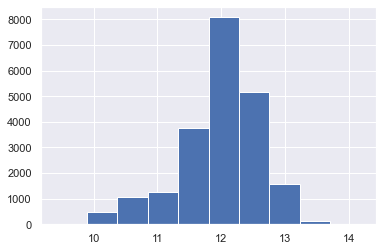

In [39]:
X_train['fnlwgt'].hist()

In [40]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
est.fit(X_train[['hours-per-week']])
X_train['hours-per-week_tr'] = est.transform(X_train[['hours-per-week']])

# here I did some binning on the hours per week into 5 bins

In [41]:
X_test['hours-per-week_tr'] = est.transform(X_test[['hours-per-week']])

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler_lon = MinMaxScaler()
scaler_lon.fit(X_train[['capital-gain']])
X_train['capital-gain_mm_scale'] = scaler_lon.transform(X_train[['capital-gain']])
X_test['capital-gain_mm_scale'] = scaler_lon.transform(X_test[['capital-gain']])

# normalized capital gain by min max noramilization as it has large numbers.

13. Select features according to the correlations and other criteria (cardinality, value distribution, % of similar values in the column, drop ids, etc...) - see helper function. By selecting features we mean - drop any unwanted features. **Make sure you are left only with features that we can you in a model**

In [43]:
final_features = ['age', 'sex_ Male', 'race_num', 'fnlwgt', 'capital-gain_mm_scale', 'hours-per-week_tr',
                 'education', 'education-num', 'marital-status']
X_train = X_train[final_features]
X_test = X_test[final_features]

# I have removed native country as most of it is in the USA
# I have removed relationship as it covered by sex and marital status
# I have removed workclass for the same reason as native-country
# I have removed ID at the begining of the exam

# all other features as sex, race, etc.. has good correlation and will predict the target well in my opinion
